<a href="https://colab.research.google.com/github/prudhvijiddigam/Computational-Methods/blob/main/In_Class_exercises_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10 (20 points in total, 4/16/2021)

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [3]:
#Write your code here.

import re
import nltk
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')
%matplotlib inline
dataset = pd.read_csv(r'/content/Amazon_Unlocked_Mobile.csv')

dataset.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [4]:
print(f'Number of reviews {dataset.shape[0]}')
dataset.isnull().sum()

Number of reviews 413840


Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64

In [5]:
dataset['Reviews'].head()

0    I feel so LUCKY to have found this used (phone...
1    nice phone, nice up grade from my pantach revu...
2                                         Very pleased
3    It works good but it goes slow sometimes but i...
4    Great phone to replace my lost phone. The only...
Name: Reviews, dtype: object

In [6]:
import re
dataset['Reviews']=dataset['Reviews'].map(lambda x: re.sub('[?|!|\'|"|#]', '', str(x)))
dataset['Reviews']=dataset['Reviews'].map(lambda x: x.lower())
dataset['Reviews'].head()

0    i feel so lucky to have found this used (phone...
1    nice phone, nice up grade from my pantach revu...
2                                         very pleased
3    it works good but it goes slow sometimes but i...
4    great phone to replace my lost phone. the only...
Name: Reviews, dtype: object

In [7]:
def tolist( review, remove_stopwords=True):
    
    text = re.sub("[^a-zA-Z]"," ", review)
    words = text.lower().split()    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    x=[]
    stemmer = english_stemmer 
    for word in words:
        x.append(stemmer.stem(word))
    return(x)

In [9]:
import nltk
nltk.download('stopwords')
clean_data_reviews = []
for review in dataset['Reviews']:
    clean_data_reviews.append( " ".join(tolist(review)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectors = TfidfVectorizer(stop_words='english')
S = vectors.fit_transform(clean_data_reviews)
true_k = 10
text = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
text.fit(S)

print("most repeated words in cluster:")
order_centroids = text.cluster_centers_.argsort()[:, ::-1]
terms = vectors.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("analysis")


most repeated words in cluster:
Cluster 0:
 thank
 good
 excel
 great
 product
 love
 phone
 perfect
 work
 everyth
Cluster 1:
 work
 great
 phone
 perfect
 fine
 good
 stop
 didnt
 doesnt
 condit
Cluster 2:
 great
 excelent
 phone
 product
 price
 producto
 condit
 buy
 deal
 seller
Cluster 3:
 phone
 use
 great
 good
 batteri
 work
 love
 screen
 nice
 price
Cluster 4:
 excel
 product
 phone
 recommend
 good
 seller
 condit
 price
 love
 great
Cluster 5:
 good
 phone
 product
 price
 work
 far
 qualiti
 realli
 buy
 condit
Cluster 6:
 ok
 everyth
 phone
 good
 thank
 price
 product
 far
 work
 expect
Cluster 7:
 like
 phone
 new
 work
 look
 realli
 good
 great
 brand
 dont
Cluster 8:
 love
 phone
 great
 daughter
 new
 wife
 son
 good
 nice
 work
Cluster 9:
 perfect
 product
 good
 nice
 expect
 phone
 work
 use
 great
 love


analysis


In [16]:
Y = vectors.transform(["the phone works good"])
analysis = text.predict(Y)
print(analysis)

Y = vectors.transform(["great phone to use"])
analysis = text.predict(Y)
print(analysis)

[5]
[2]


In [ ]:
DB SCAN

In [11]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import gensim

In [15]:
Reviews_data=[]
for t in dataset['Reviews']:
  Reviews_data.append(t.split())
import gensim
w2v_model=gensim.models.Word2Vec(Reviews_data, size=10, workers=4)

In [17]:
data_vectors = []
for t in Reviews_data:
    vector = np.zeros(100)
    words = 0
    for word in t:
        try:
            vec = w2v_model.wv[word]
            vector += vec
            words += 1
        except:
            pass
    vector /= words
    data_vectors.append(vector)
    
data_vectors = np.array(data_vectors)
data_vectors = np.nan_to_num(data_vectors)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [22]:
from sklearn.cluster import DBSCAN
minPts = 2 * 100

def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l
def compute200thnearestneighbour(x, data): # Returns the distance of 200th nearest neighbour.
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if(len(dists) == 200 and dists[199] > dist): # If distance is larger than current largest distance found.
            l = int(lower_bound(dists, dist)) # Using the lower bound function to get the right position.
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] 

In [23]:
data_vectors.shape

(413840, 100)

In [24]:
twohundrethneigh = []
for val in data_vectors[:500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, data_vectors[:500]))
twohundrethneigh.sort()

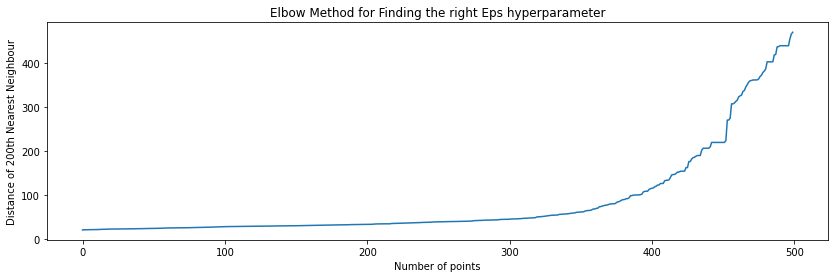

In [25]:
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [ ]:
HIERARCHIAL CLUSTERRING


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib.pyplot as plt
vectorizer = CountVectorizer(stop_words='english') 
dtm2 = vectorizer.fit_transform(clean_data_reviews) 
vocab2 = vectorizer.get_feature_names()
dtm2 = dtm2.toarray()
cos_dist2 = 1 - cosine_similarity(dtm2)
linkage_matrix2 = ward(cos_dist2)
dendrogram(linkage_matrix2, color_threshold=0.6*max(linkage_matrix2[:,2]), orientation="right")
plt.tight_layout()
plt.show()

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 

In [ ]:
#You can write you answer here.

## K-means is a clustering algorithm that uses centroid based or partion based clustering. The algorithm divides the sample 
space into K groups based on their similarity. The euclidian distance is used to access similarity.DBScan is a clustering algorithm depends
on density. The main feature of this algorithm is that each point is acluster must have minimum number of neighbours
within a given radius.The alogorithm is shown to be very effective at identifying outliers and noises.Hierarchial
clustering is a algorithm that divides objects into clusters based on their similarity.The endpoint is a set of clusters, 
each of which is distinct from others while articrafts within cluster are broadly identified. 
